In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from flask import Flask, jsonify

In [3]:
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
    #print(column) #for more details

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])
    #or print(column) for more details

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [12]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)

In [13]:
#fetchall to look at data in table
    
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
#number of stations
session.query(station).group_by(station.station).count()


9

In [15]:
#fetchall to look at data in table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
#number of measurements

session.query(measurement).group_by(measurement.date).count()

2792

In [17]:
# Earliest Date
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [18]:
# Latest Date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

year_ago = (dt.datetime(2017, 8, 23)) - dt.timedelta(days=366)
print(year_ago)


2016-08-22 00:00:00


In [20]:
# Perform a query to retrieve the date and precipitation scores
sel = [measurement.date, measurement.prcp]

precip = session.query(*sel).filter(measurement.date >= year_ago).all()
precip


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns =['date', 'prcp'])
precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [22]:
# Set the index to be "date" so they will be used as labels
precip_df = precip_df.set_index('date')



#sort data frame
precip_df = precip_df.sort_values(by = 'date')
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


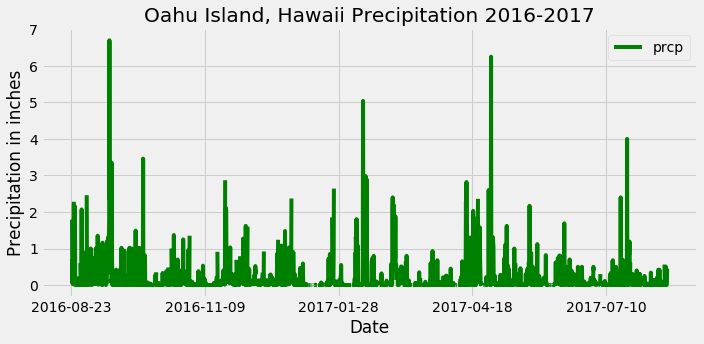

In [23]:

#plot data
fig, ax = plt.subplots(figsize = (10, 5))
precip_df.plot(ax = ax, x_compat = True, color='green')

#set title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation in inches')
ax.set_title("Oahu Island, Hawaii Precipitation 2016-2017")

#save figure
#plt.savefig("Images/precip.png")

#plot figure
plt.tight_layout()
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df[["prcp"]].describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?
#number of stations
session.query(station).group_by(station.station).count()


9

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
                .order_by(func.count(measurement.station).desc()).all()
count_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_station = "USC00519281"
temps_most_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
                .filter(measurement.station == most_station).all()

#temps_most_station

print(f"Lowest Temperature: {temps_most_station[0][0]} oF")
print(f"Highest Temperature: {temps_most_station[0][1]} oF")
print(f"Average Temperature: {round(temps_most_station[0][2], 2)} oF")

Lowest Temperature: 54.0 oF
Highest Temperature: 85.0 oF
Average Temperature: 71.66 oF


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [measurement.date, measurement.tobs]

temps_year = session.query(*sel).filter(measurement.station ==most_station).filter(measurement.date >= year_ago).all()
temps_year


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temps_year_df = pd.DataFrame(temps_year, columns =['date', 'tobs'])
temps_year_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [30]:
# Set the index to be "date" so they will be used as labels
temps_year_df = temps_year_df.set_index('date')

#sort data frame
temps_year_df = temps_year_df.sort_values(by = 'date')
temps_year_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


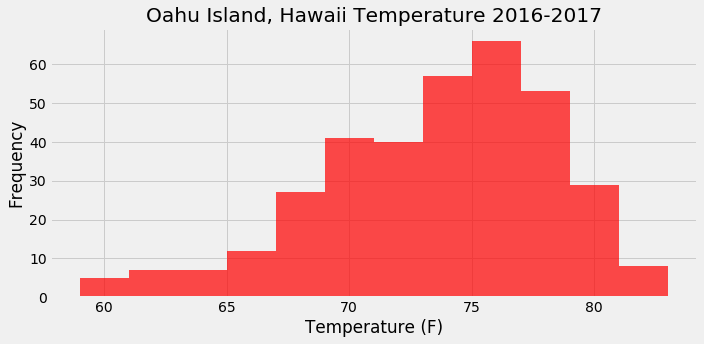

In [31]:

#plot data
fig, ax = plt.subplots(figsize = (10, 5))
temps_year_df.hist(ax = ax, bins=12, alpha=0.7, color='red')

#set title and labels
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Frequency')
ax.set_title("Oahu Island, Hawaii Temperature 2016-2017")

#save figure
#plt.savefig("Images/precip.png")

#plot figure
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = ('2016-10-05')
trip_end = ('2016-10-19')
#print(calc_temps('2016-10-05', '2016-10-19'))
trip_ave = (calc_temps(trip_start, trip_end))
print(trip_ave)

[(70.0, 77.6842105263158, 82.0)]


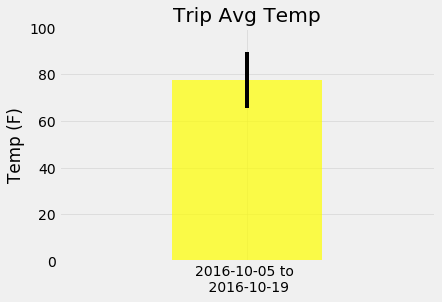

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min_triptemp = trip_ave[0][0]
avg_triptemp = trip_ave[0][1]
max_triptemp = trip_ave[0][2]
error_ptp = max_triptemp - min_triptemp

trip = '2016-10-05 to \n 2016-10-19'

plt.bar(trip, avg_triptemp, yerr=error_ptp, alpha = .7, color="yellow")
plt.ylim(0, 100)
plt.xlim(-1, 1)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.5)

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_start = ('2016-10-05')
trip_end = ('2016-10-19')

sel=[func.sum(measurement.prcp), station.station, station.name, station.latitude,\
         station.longitude, station.elevation]
trip_rain = session.query(*sel).filter(station.station==measurement.station)\
                .filter(measurement.date >= trip_start)\
                .filter(measurement.date <= trip_end)\
                .group_by(station.station)\
                .order_by(func.sum(measurement.prcp).desc()).all()

print(trip_rain)



[(2.52, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (0.5000000000000001, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (0.24, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (0.13999999999999999, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (0.11, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (0.07, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (0.01, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)]


In [36]:
#create a dataframe of total trip precip for each station

trip_rain_df = pd.DataFrame(np.array(trip_rain))
trip_rain_df = trip_rain_df.rename(columns ={0:"Total Trip Precipitation", 1:"Station ID", 2:"Station Name", 3:"Latitude",
                                                4:"Longitude", 5:"Elevation"})
trip_rain_df

,Total Trip Precipitation,Station ID,Station Name,Latitude,Longitude,Elevation
0,2.52,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1,0.5000000000000001,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84888999999998,32.9
2,0.24,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
3,0.13999999999999999,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,0.11,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
5,0.07,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
6,0.01,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
def daily_normals_list(date):
    
    sel = [(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
#daily_normals_list("01-01")

In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Strip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date



In [40]:
#trip dates & length of trip
trip_start = ('2016-10-05')
trip_end = ('2016-10-19')
trip_length = int(trip_end[-2:]) - int(trip_start[-2:]) +1
print(trip_length)


15


In [41]:
# Strip off the year and save a list of %m-%d strings
md_start = dt.datetime.strptime(trip_start, '%Y-%m-%d')
md_end = dt.datetime.strptime(trip_end, '%Y-%m-%d')
print(md_start, md_end)

date_list = [dt.datetime.strftime(md_start + dt.timedelta(days=x), '%m-%d') for x in range(0, trip_length)]
print(date_list)

2016-10-05 00:00:00 2016-10-19 00:00:00
['10-05', '10-06', '10-07', '10-08', '10-09', '10-10', '10-11', '10-12', '10-13', '10-14', '10-15', '10-16', '10-17', '10-18', '10-19']


In [42]:
# Loop through the list of %m-%d strings and calculate the normals for each date
trip_normals = [daily_normals(date) for date in date_list]


trip_normals

[[(67.0, 76.16666666666667, 84.0)],
 [(70.0, 75.42, 81.0)],
 [(68.0, 75.6078431372549, 81.0)],
 [(66.0, 76.3265306122449, 86.0)],
 [(69.0, 76.11363636363636, 84.0)],
 [(69.0, 75.85416666666667, 83.0)],
 [(69.0, 76.57142857142857, 84.0)],
 [(65.0, 75.75510204081633, 82.0)],
 [(65.0, 75.98039215686275, 84.0)],
 [(67.0, 75.1923076923077, 82.0)],
 [(67.0, 75.63461538461539, 82.0)],
 [(67.0, 75.59183673469387, 81.0)],
 [(65.0, 75.07843137254902, 83.0)],
 [(65.0, 75.0, 83.0)],
 [(65.0, 73.24489795918367, 81.0)]]

In [43]:
normal_list = [np.array(temp[0]) for temp in trip_normals]

In [44]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normals_df = pd.DataFrame(normal_list)

trip_normals_df["Date"]=date_list
trip_normals_df = trip_normals_df.set_index("Date")
trip_normals_df = trip_normals_df.rename(columns={0:"Low Temp", 1: "Ave Temp", 2:"High Temp"})

trip_normals_df

,Low Temp,Ave Temp,High Temp
Date,,,
10-05,67.0,76.166667,84.0
10-06,70.0,75.420000,81.0
10-07,68.0,75.607843,81.0
10-08,66.0,76.326531,86.0
10-09,69.0,76.113636,84.0
10-10,69.0,75.854167,83.0
10-11,69.0,76.571429,84.0
10-12,65.0,75.755102,82.0
10-13,65.0,75.980392,84.0


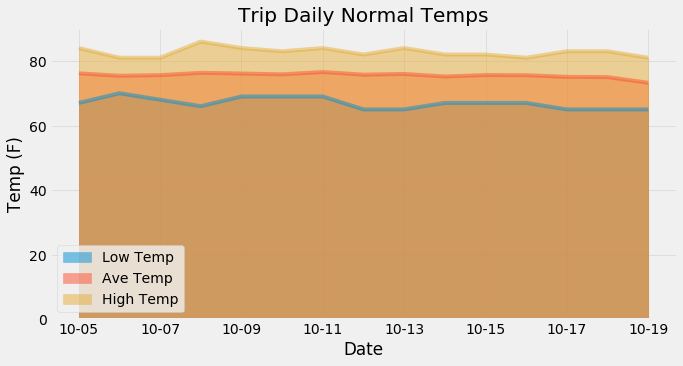

In [45]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (10, 5))
trip_normals_df.plot.area(ax=ax, stacked=False)
plt.legend(loc='lower left')
plt.title('Trip Daily Normal Temps')
plt.ylabel('Temp (F)')
plt.grid(alpha=.5)

plt.show()


In [46]:
#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, 
#for example, June and December?

#Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.

#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?



In [47]:
def month_normals(month):
    
    sel = [func.avg(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m", measurement.date) == month).all()
    
#month_normals("11")

In [48]:
june_ave = month_normals("06")
print(june_ave)

[(74.94411764705882,)]


In [49]:
dec_ave = month_normals("12")
print(dec_ave)

[(71.04152933421226,)]


In [50]:
def month_norm(month):
    
    sel = [(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m", measurement.date) == month).all()
    
#month_norm("12")

In [51]:
stats.ttest_ind(month_norm("06"), month_norm("12"), equal_var = False)

Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))